# Lagrange polynomials
Illustration of simple properties of Lagrange polynomials from the ANN perspective

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:200% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [3]:
def f(x) :
    # a function to be represented
    return np.exp(-x**2*np.sin(np.pi*x)/2)*(0.2*x + 0.43)

The general view of the approximated function

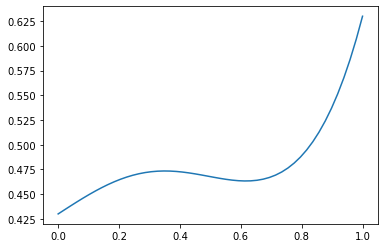

In [4]:
xran = np.linspace(0, 1, 50)
plt.plot(xran, f(xran))

The function finding parameters of the Lagrange approximation

In [5]:
def LNN(x, xtrain, ytrain) :
    # INPUT: pairs x_i, y_i in arrays xtrain and ytrain
    # OUTPUT: the evaluation of the Lagrange polynomial at x
    
    def PN(x, xt, num) :
        # Evaluates the num-th term in the Lagrange polynomial
        out = 1
        for jj in range(len(xt)) :
            if jj == num :
                continue
            out *= (x - xt[jj])/(xt[num] - xt[jj])
        return out
    
    N = len(xtrain) 
    if N != len(ytrain) :
        raise ValueError("The Lagrange interpolation requires matching lists of x and f(x)")
        
    out = 0
    for ii in range(N) :
        out += ytrain[ii]*PN(x, xtrain, ii)
        
    return out

Since the function is not too regular, it is sufficient to take some random points as the data points

In [6]:
Np = 300
xdata = np.linspace(0, 1, Np)

Ntrain = 47
inds = rnd.sample(range(Np), Ntrain)
xtrain = xdata[inds]
ytrain = f(xtrain)

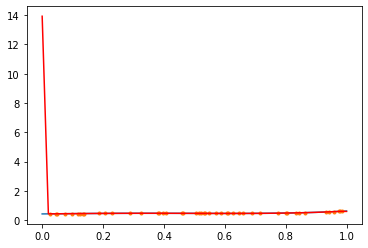

In [7]:
plt.plot(xran, f(xran))
plt.plot(xtrain, ytrain, '.')
plt.plot(xran, LNN(xran, xtrain, ytrain), 'r')

We illustrate Runge's phenomenon by plotting a bunch of samples for a given number of data points

In [15]:
def burstLNN(func, xdata, Numtrain, Numbursts) :
    Np = len(xdata)
    
    for ii in range(Numbursts) :
        plt.subplot(1, Numbursts, ii + 1)
        inds = rnd.sample(range(Np), Numtrain)
        xtrain = xdata[inds]
        ytrain = func(xtrain)
        
        plt.plot(xdata, func(xdata))
        plt.plot(xtrain, ytrain, '.', markersize = 13)
        plt.plot(xdata, LNN(xdata, xtrain, ytrain), 'r')

This is an example of a balanced choice of the number of fitting points

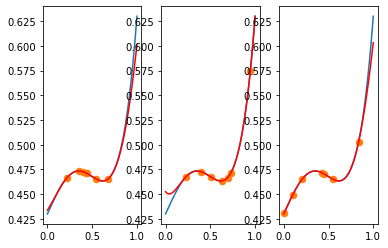

In [19]:
burstLNN(f, xdata, 7, 3)

This is how the approximation looks like when the number of fitting points is too small

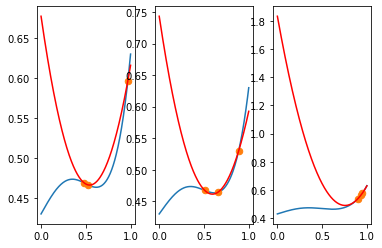

In [20]:
burstLNN(f, xdata, 3, 3)

Chances are some of the graphs will demonstrate Runge's phenomenon (strong deviation near the edges of the domain), which emerge when the number of fitting points (the degree of the Lagrange polynomial) is too high

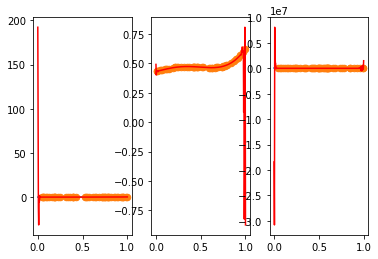

In [21]:
burstLNN(f, xdata, 50, 3)